Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
fraud[fraud.duplicated()].shape

(0, 6)

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


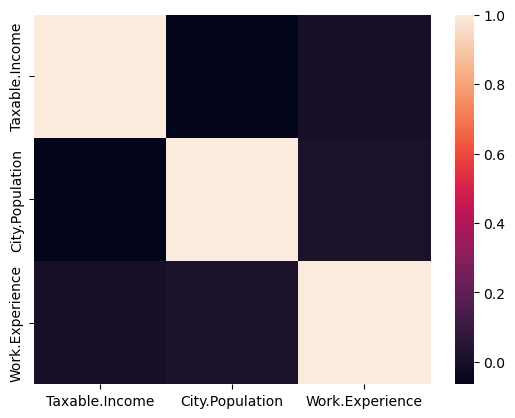

In [9]:
sns.heatmap(fraud.corr())
fraud.corr()

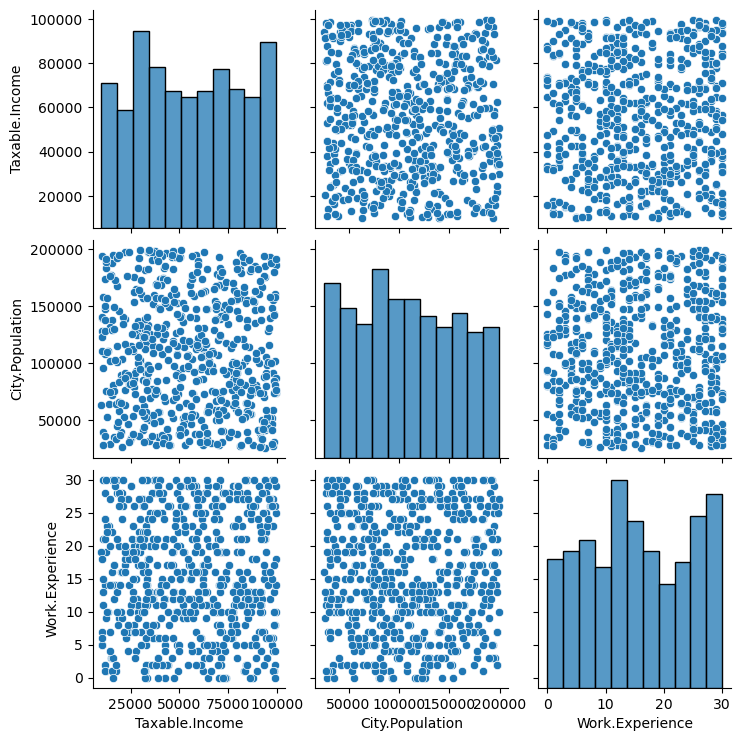

In [10]:
sns.pairplot(fraud);

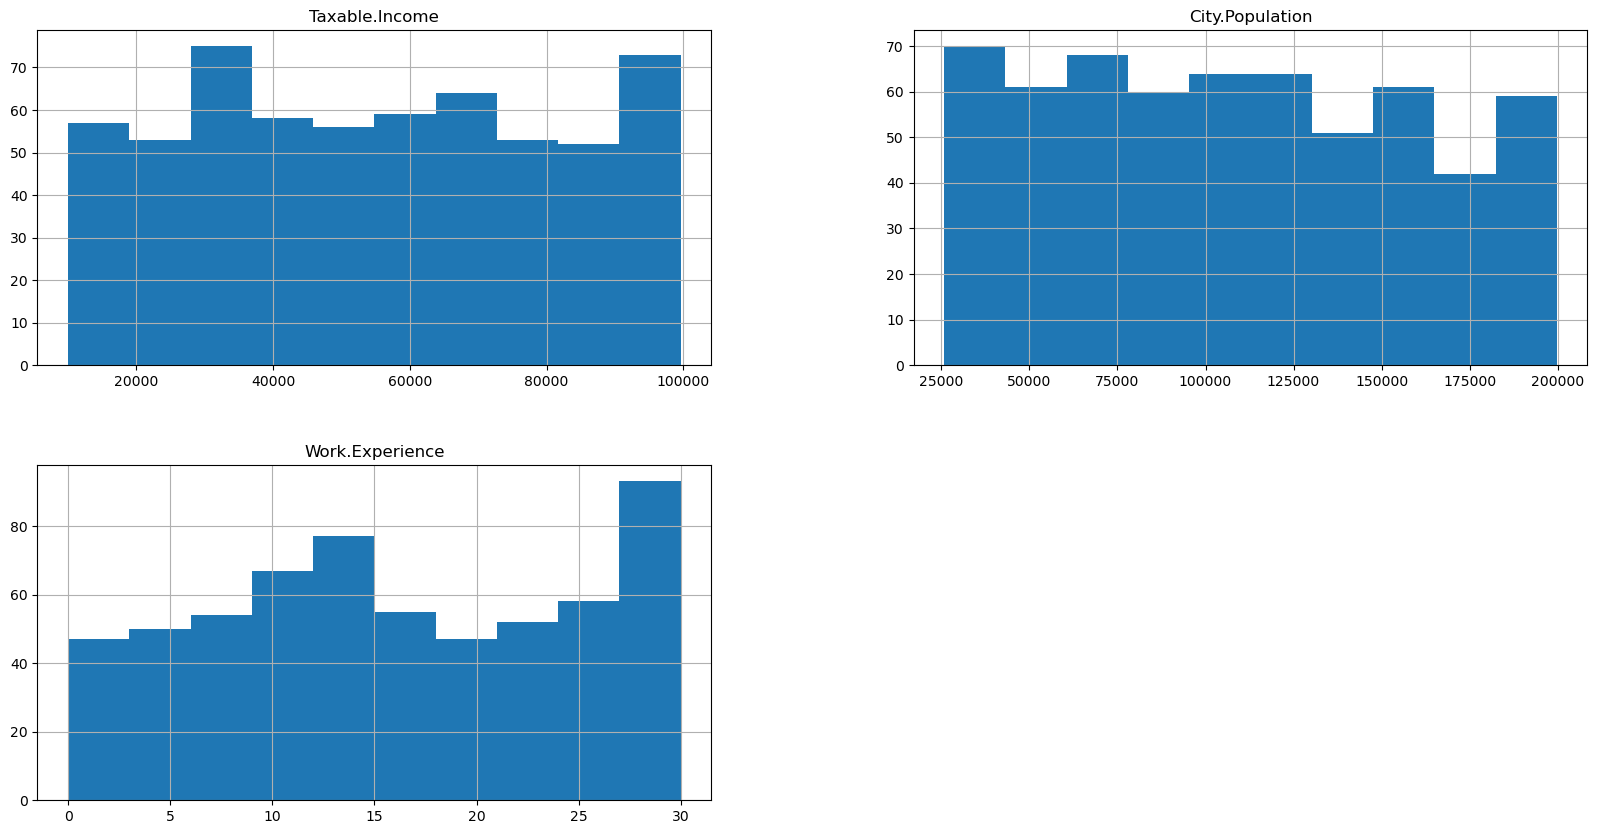

In [11]:
fraud.hist(figsize=(20,10))
plt.show()

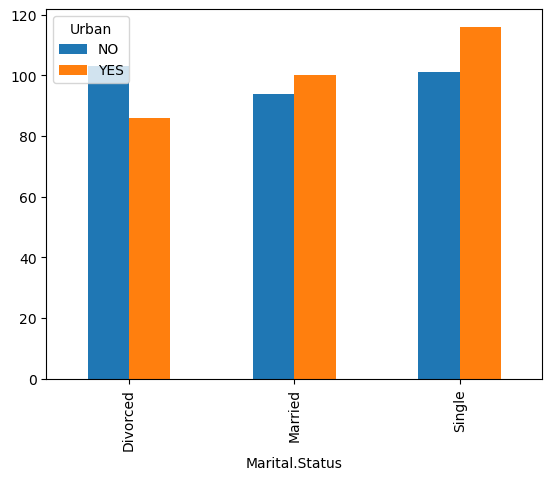

In [12]:
pd.crosstab(fraud['Marital.Status'],fraud['Urban']).plot(kind='bar')
plt.show()

In [13]:
label_encoder = preprocessing.LabelEncoder()
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])

In [14]:
fraud['Marital.Status'] = fraud['Marital.Status'].map({'Single':1, 'Divorced':2, 'Married':3}) 

In [15]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,3,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,3,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,3,98592,180083,17,0


In [16]:
fraud['Taxable.Income'] = pd.cut(fraud['Taxable.Income'], bins=[0,30000,99620], labels=['risky', 'good'])

In [17]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,good,50047,10,1
1,1,2,good,134075,18,1
2,0,3,good,160205,30,1
3,1,1,good,193264,15,1
4,0,3,good,27533,28,0


In [18]:
fraud = fraud.rename(columns={'Marital.Status':'Marital',
                             'Taxable.Income': 'Taxinc',
                             'City.Population':'Population',
                             'Work.Experience':'Experience'})

In [19]:
fraud.head()

,Undergrad,Marital,Taxinc,Population,Experience,Urban
0,0,1,good,50047,10,1
1,1,2,good,134075,18,1
2,0,3,good,160205,30,1
3,1,1,good,193264,15,1
4,0,3,good,27533,28,0


In [20]:
fraud['Taxinc'] = label_encoder.fit_transform(fraud['Taxinc'])

In [21]:
fraud

,Undergrad,Marital,Taxinc,Population,Experience,Urban
0,0,1,0,50047,10,1
1,1,2,0,134075,18,1
2,0,3,0,160205,30,1
3,1,1,0,193264,15,1
4,0,3,0,27533,28,0
...,...,...,...,...,...,...
595,1,2,0,39492,7,1
596,1,2,0,55369,2,1
597,0,2,0,154058,0,1
598,1,3,0,180083,17,0


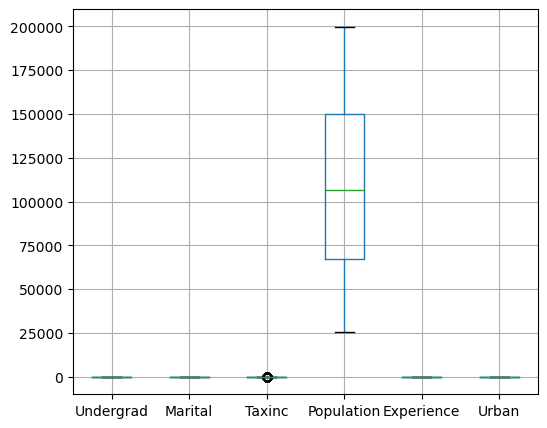

In [22]:
plt.figure(figsize=(6,5))
fraud.boxplot()
plt.show()

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [24]:
df_norm = norm_func(fraud)
df_norm

,Undergrad,Marital,Taxinc,Population,Experience,Urban
0,0.0,0.0,0.0,0.139472,0.333333,1.0
1,1.0,0.5,0.0,0.622394,0.600000,1.0
2,0.0,1.0,0.0,0.772568,1.000000,1.0
3,1.0,0.0,0.0,0.962563,0.500000,1.0
4,0.0,1.0,0.0,0.010081,0.933333,0.0
...,...,...,...,...,...,...
595,1.0,0.5,0.0,0.078811,0.233333,1.0
596,1.0,0.5,0.0,0.170058,0.066667,1.0
597,0.0,0.5,0.0,0.737240,0.000000,1.0
598,1.0,1.0,0.0,0.886810,0.566667,0.0


In [25]:
X = df_norm.iloc[:, [0,1,3,4,5]]
Y = df_norm['Taxinc']

In [26]:
X

,Undergrad,Marital,Population,Experience,Urban
0,0.0,0.0,0.139472,0.333333,1.0
1,1.0,0.5,0.622394,0.600000,1.0
2,0.0,1.0,0.772568,1.000000,1.0
3,1.0,0.0,0.962563,0.500000,1.0
4,0.0,1.0,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.5,0.078811,0.233333,1.0
596,1.0,0.5,0.170058,0.066667,1.0
597,0.0,0.5,0.737240,0.000000,1.0
598,1.0,1.0,0.886810,0.566667,0.0


In [27]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxinc, Length: 600, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [29]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

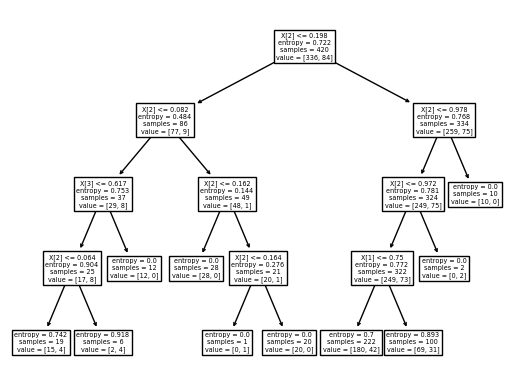

In [30]:
tree.plot_tree(model)
plt.show()

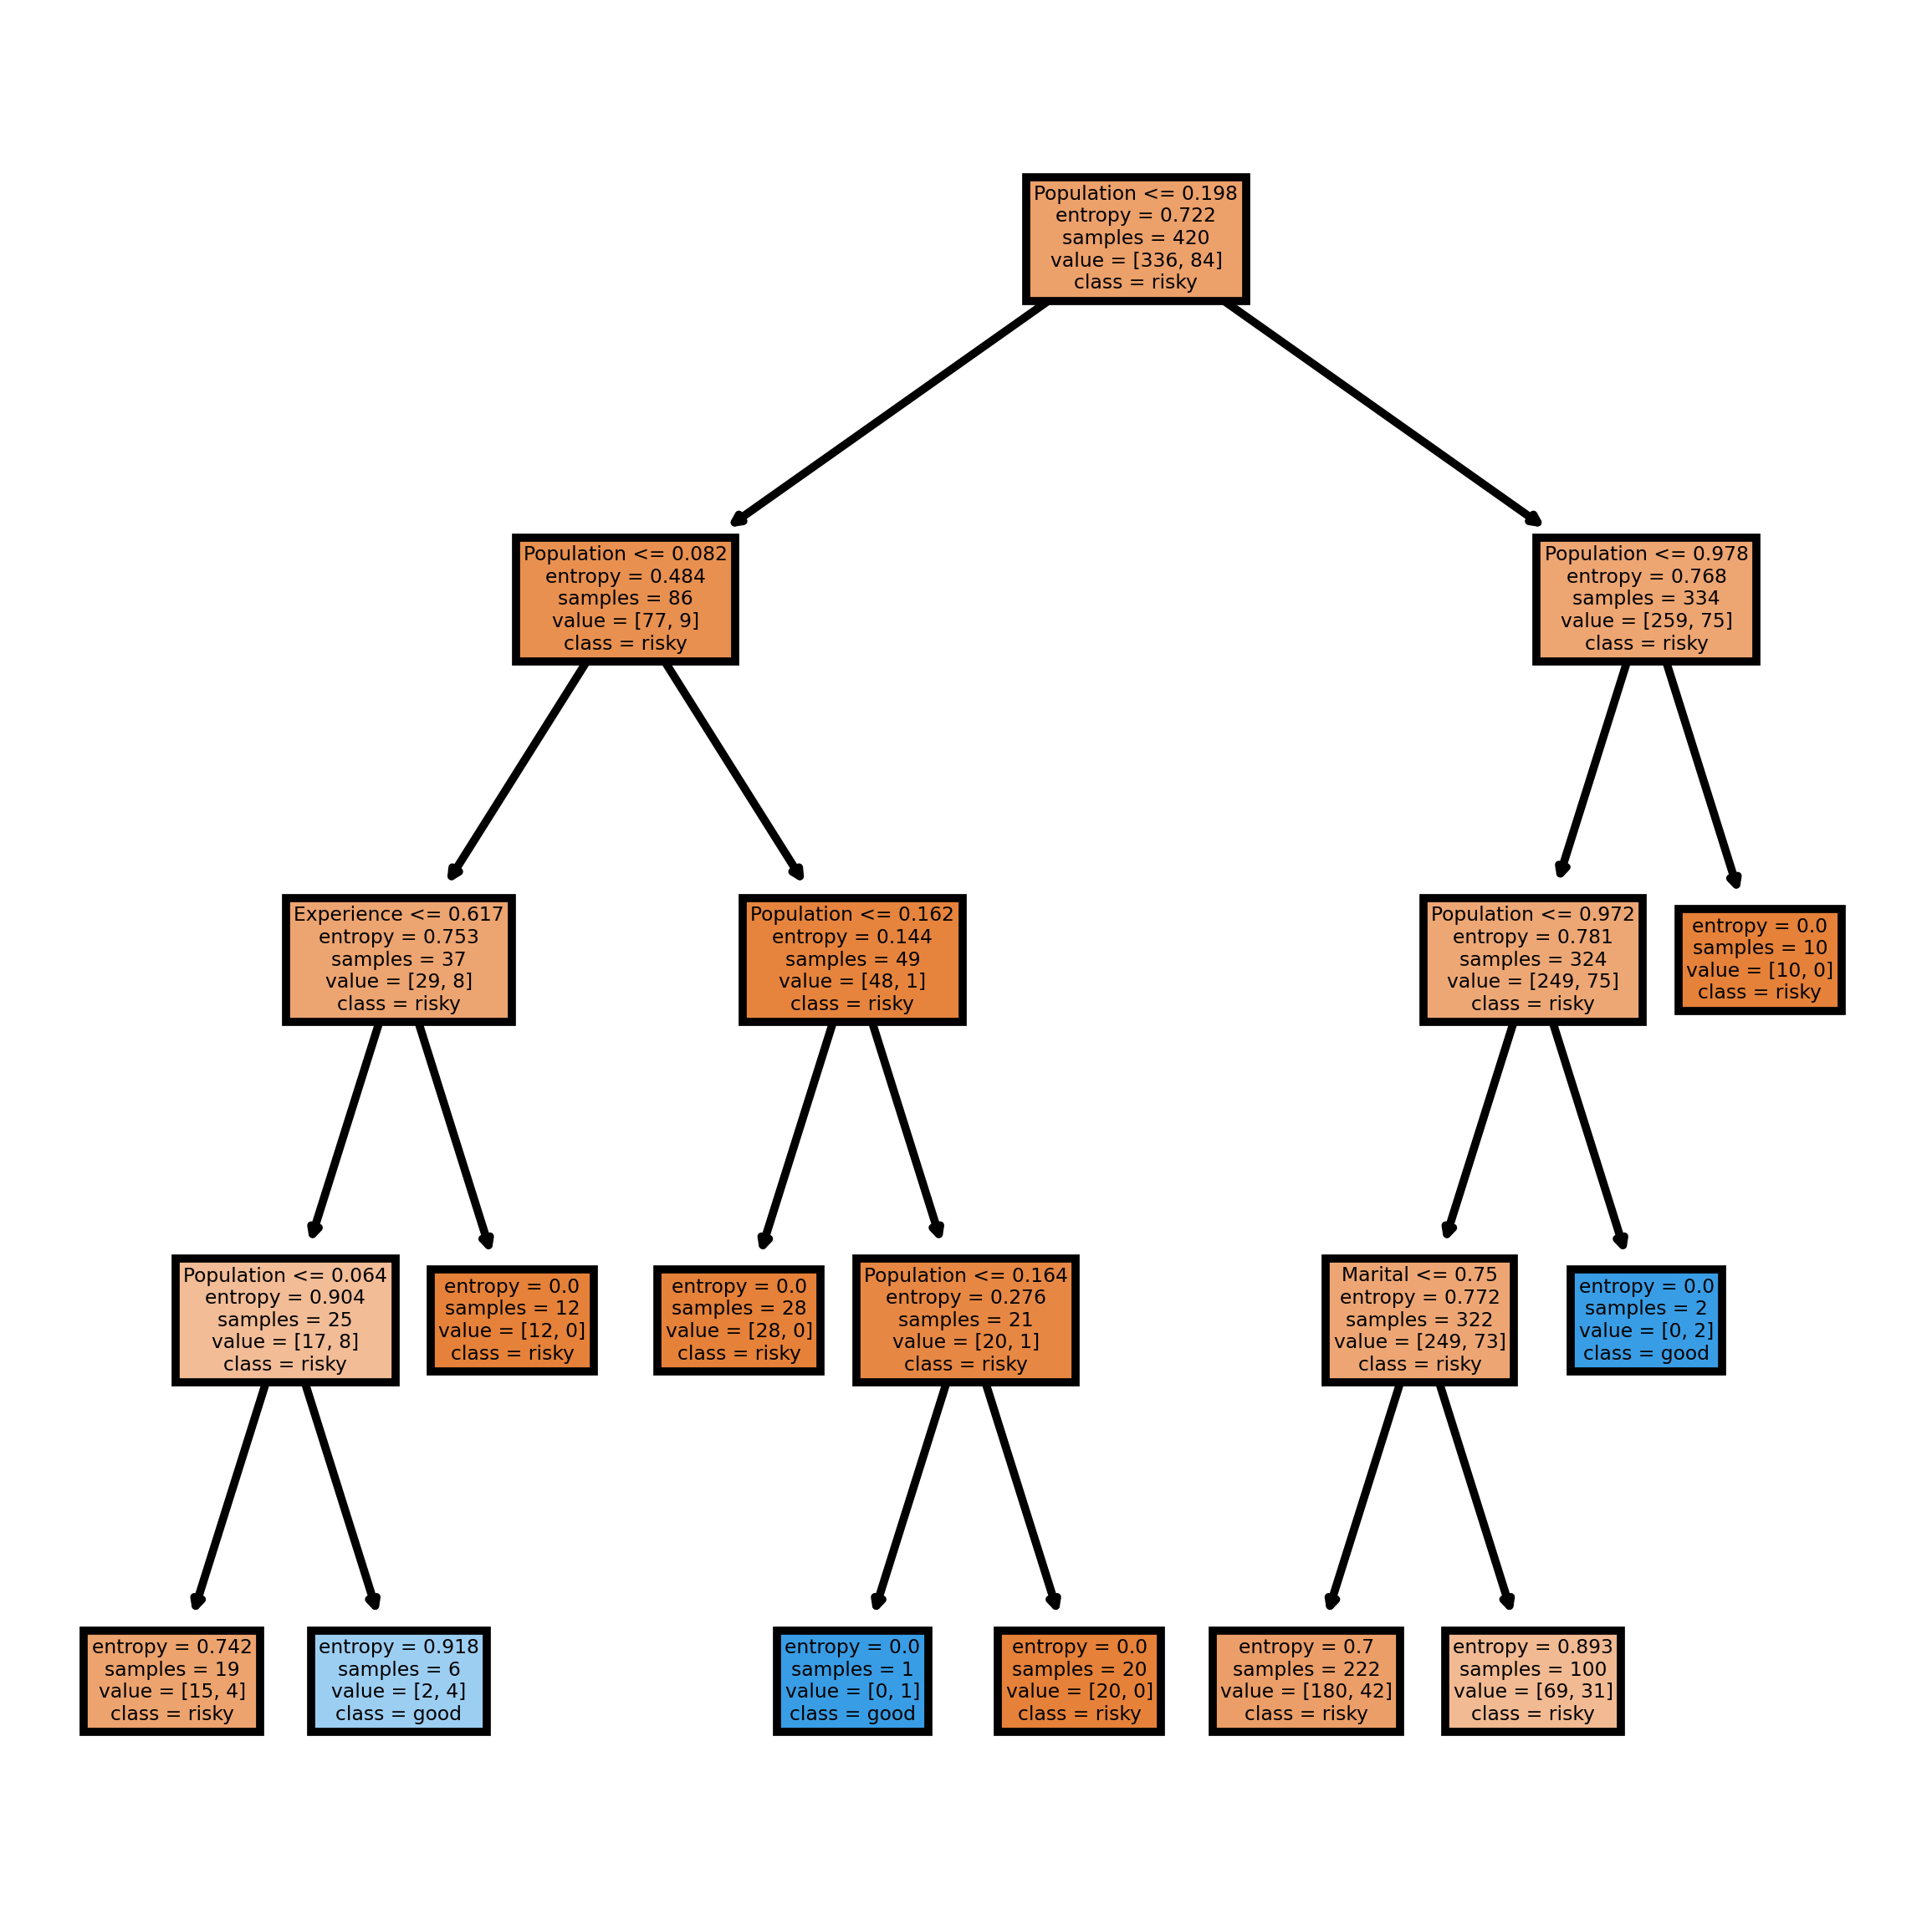

In [31]:
fn = ['Undergrad','Marital','Population','Experience','Urban']
cn = ['risky','good']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=700)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [32]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
y_test

159    0.0
307    0.0
253    0.0
528    0.0
137    1.0
      ... 
221    0.0
390    0.0
530    0.0
232    1.0
139    0.0
Name: Taxinc, Length: 180, dtype: float64

In [34]:
pd.crosstab(y_pred,y_test)

Taxinc,0.0,1.0
row_0,,
0.0,137,40
1.0,3,0


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7611111111111111

In [36]:
model.score(x_train,y_train)

0.8119047619047619

### Finding the best hyper-parameter for the decision tree

In [37]:
dt = DecisionTreeClassifier()

In [38]:
grid_param = {'criterion':['entropy','gini'],
             'max_depth' : [2,3,4,5,6,7,8,9,10],
             'min_samples_split' : [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]}


In [39]:
grid_search = GridSearchCV(dt, grid_param, cv=5)

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8


In [42]:
# decision tree for the best model
model_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_split=2,min_samples_leaf=1)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

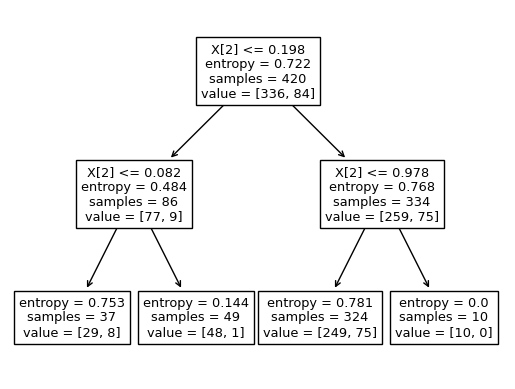

In [43]:
#PLot the decision tree
tree.plot_tree(model_best);
plt.show()

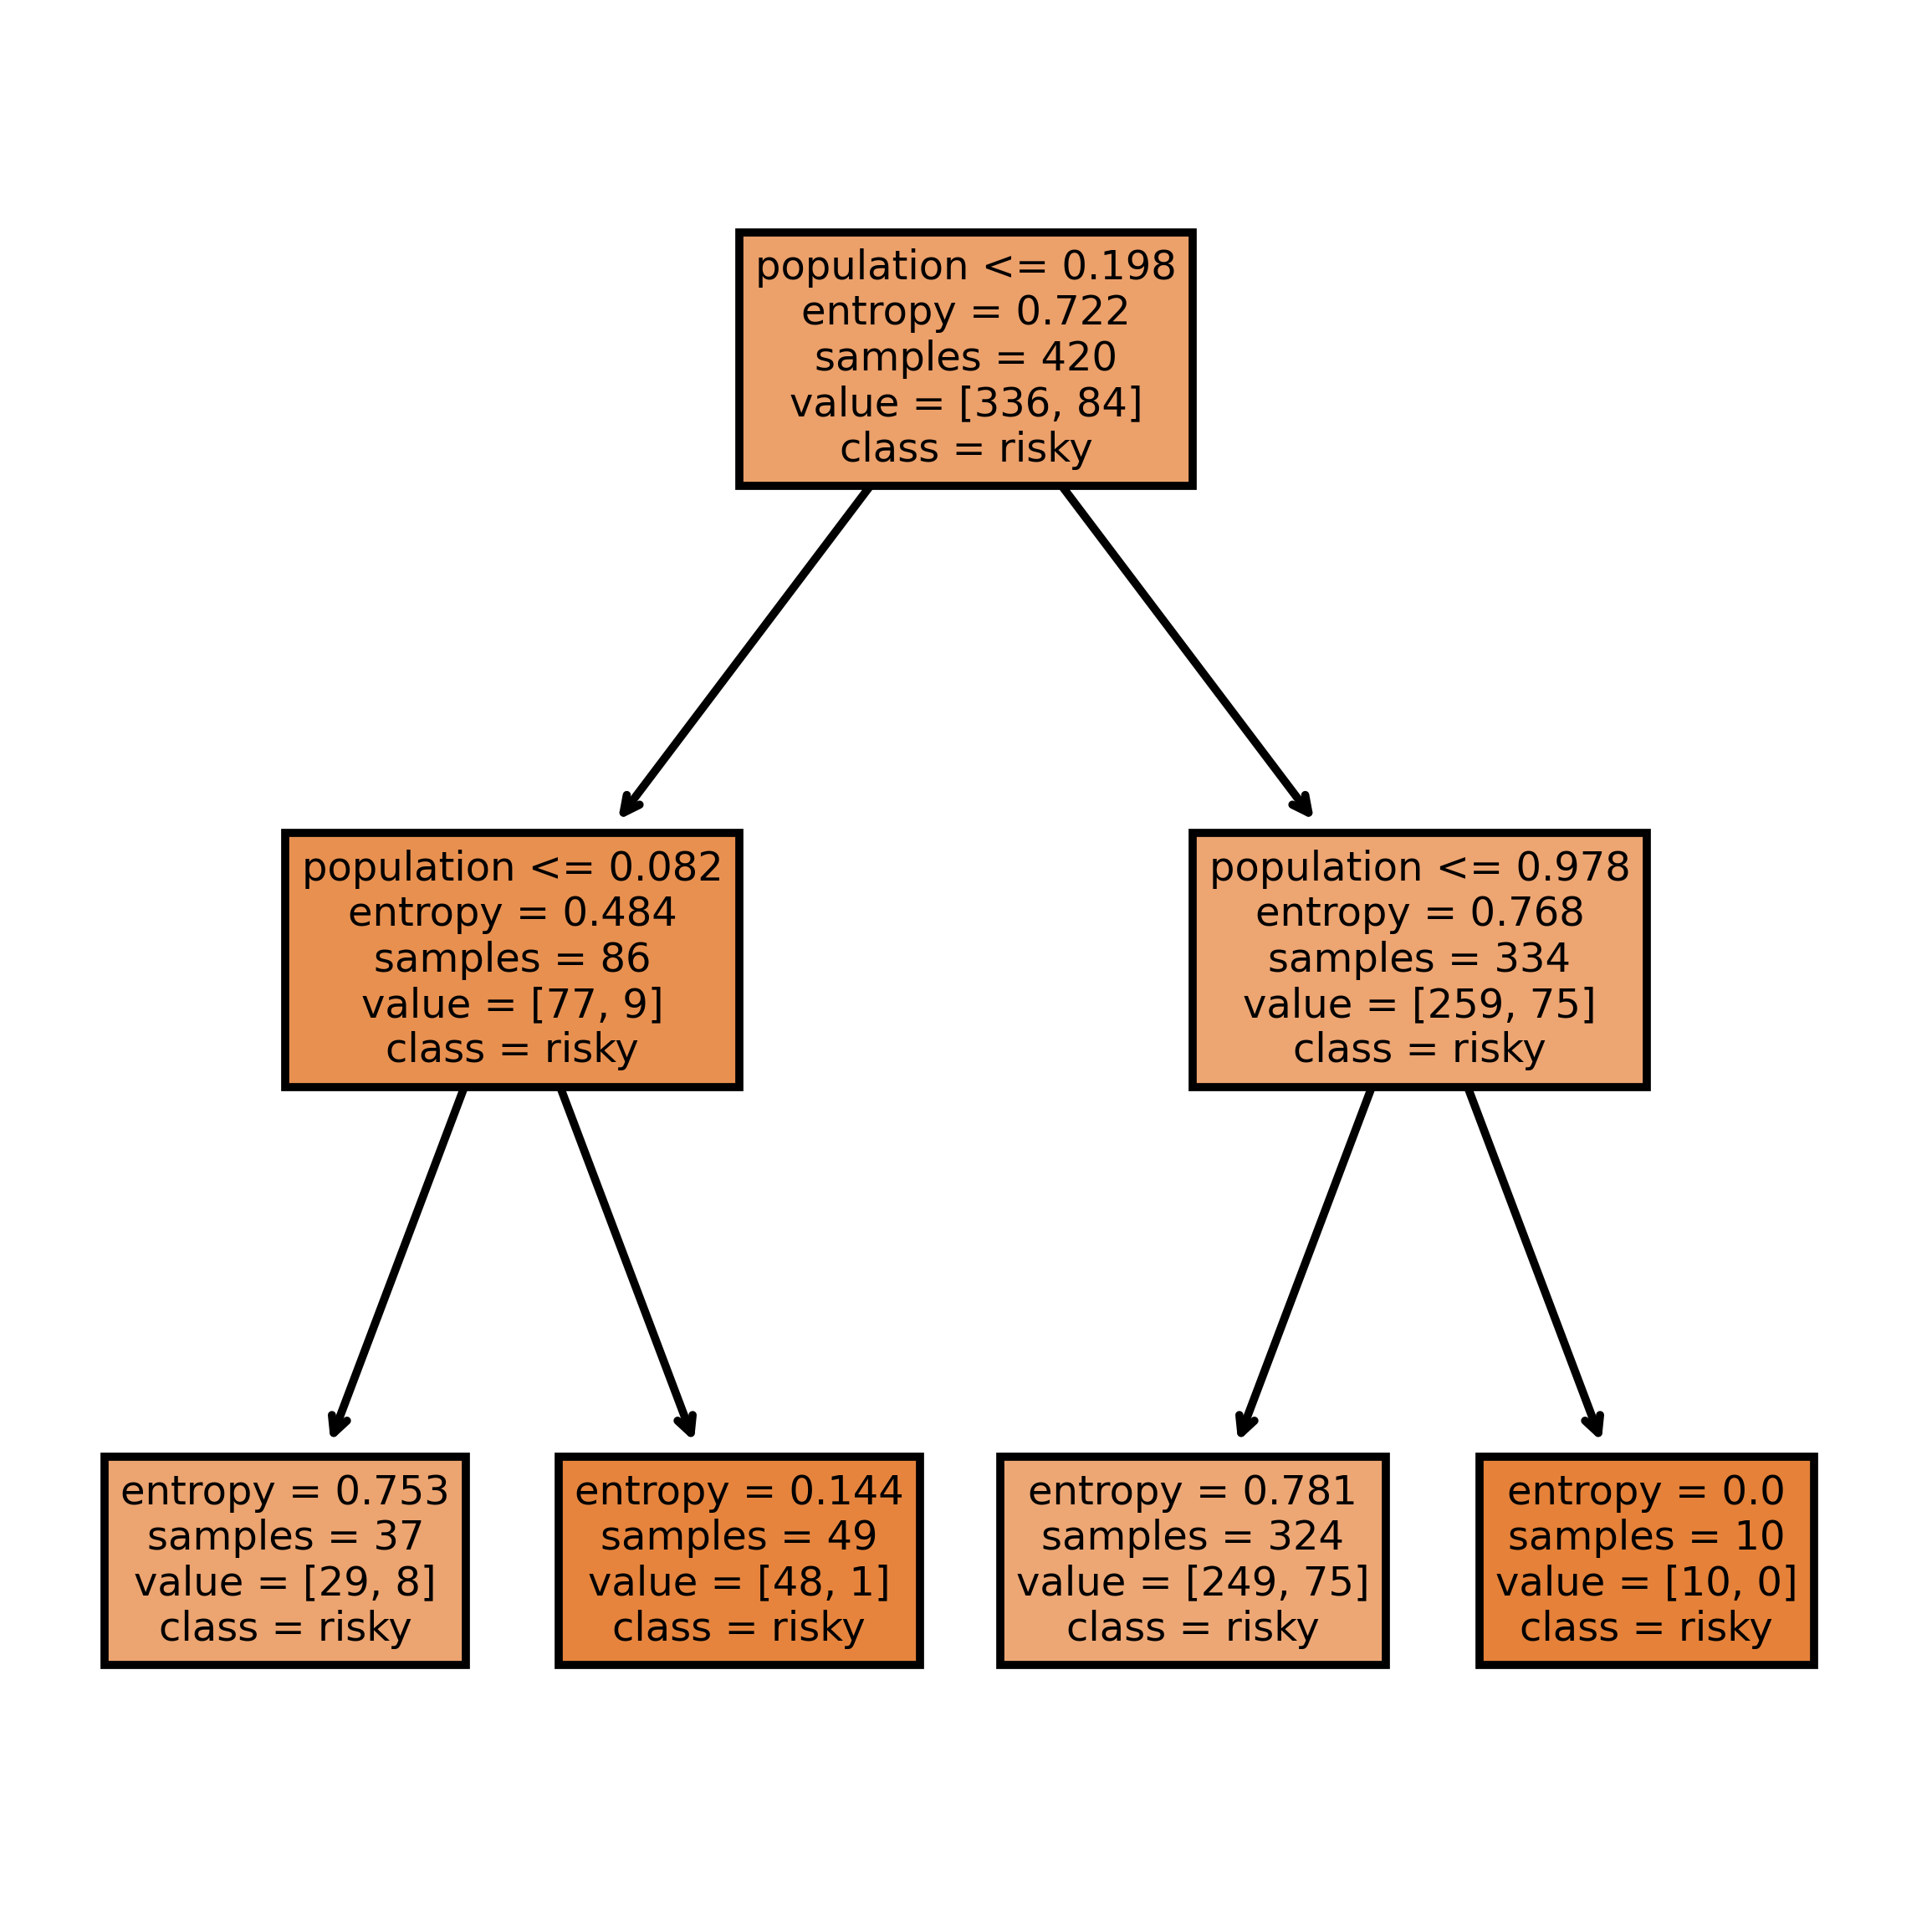

In [44]:
fn=['Undergrad', 'marital', 'population', 'Experience', 'Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model_best,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [45]:
#Predicting on test data
preds_best = model_best.predict(x_test) # predicting on test data set 
pd.Series(preds_best).value_counts() # getting the count of each category 

0.0    180
dtype: int64

In [46]:
preds_best

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
pd.crosstab(y_test,preds_best) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0
Taxinc,
0.0,140
1.0,40


<AxesSubplot:xlabel='col_0', ylabel='Taxinc'>

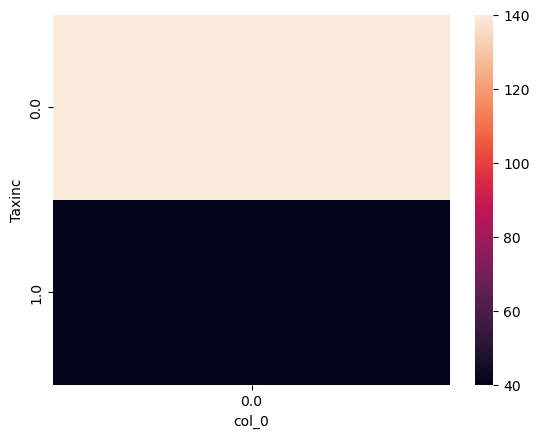

In [48]:
sns.heatmap(pd.crosstab(y_test,preds_best))

In [49]:
print("the accuracy of the model =",accuracy_score(y_test,preds_best)*100)

the accuracy of the model = 77.77777777777779
